In [33]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
import pandas as pd
import seaborn as sns
from datetime import datetime, timedelta
import matplotlib.dates as mdates
import json

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = [5.0, 3.0]
plt.rcParams['figure.dpi'] = 150
%matplotlib notebook

In [34]:
true_data = pd.read_csv("csv_data/usa.txt",sep=' ', skipinitialspace=True, \
                        skiprows=1, header=None, names=['confirmed', 'recovered', 'deaths'])
true_data

,confirmed,recovered,deaths
0,1,0,0
1,1,0,0
2,2,0,0
3,2,0,0
4,5,0,0
...,...,...,...
696,50805294,0,806583
697,50892021,0,806749
698,51133980,0,808201
699,51312430,0,810045


In [35]:
smoothed_data = pd.read_csv("../C++/build/release/results/usa_popsmooth.txt", skipinitialspace=True, \
                            header=None, names=['confirmed_true', 'deaths_true', 'confirmed_smooth', 'deaths_smooth', 'vaccine_smooth', 'tests_smooth'])
diff_data = smoothed_data.diff();
diff_data.loc[0] = 0
smoothed_data

,confirmed_true,deaths_true,confirmed_smooth,deaths_smooth,vaccine_smooth,tests_smooth
0,1,0,1,0,0,0
1,1,0,1,0,0,0
2,2,0,2,0,0,0
3,2,0,3,0,0,0
4,5,0,4,0,0,0
...,...,...,...,...,...,...
696,50805294,806583,50829008,806453,202793688,698810753
697,50892021,806749,50994597,807722,202960847,700296997
698,51133980,808201,51139441,808729,203119166,701652340
699,51312430,810045,51333297,810105,203288624,702932744


<IPython.core.display.Javascript object>


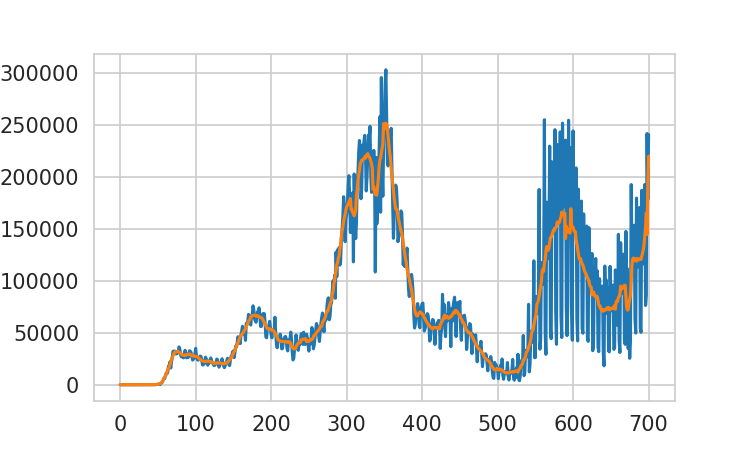

In [36]:
plt.figure()
plt.plot(diff_data['confirmed_true'])
plt.plot(diff_data['confirmed_smooth'])
plt.show()

In [ ]:
plt.figure()
plt.plot(diff_data['deaths_true'])
plt.plot(diff_data['deaths_smooth'])
plt.show()

<IPython.core.display.Javascript object>


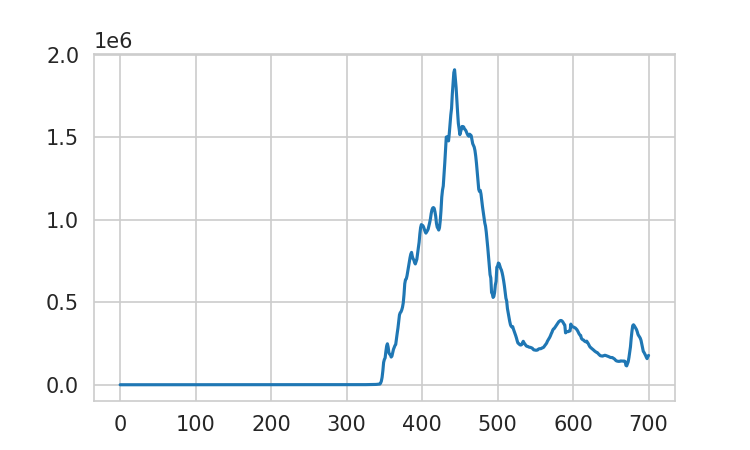

In [37]:
plt.figure()
plt.plot(diff_data['vaccine_smooth'])
plt.show()

In [170]:
pred_data = pd.read_csv("../C++/build/release/results/usa_prediction_seed1.txt", \
                        skipinitialspace=True)
# print("pred_data:\n", pred_data)
num_days = len(pred_data)
print("Num days:", num_days)

param_data = pd.read_csv("../C++/build/release/results/usa_params_seed1.txt", \
                        skipinitialspace=True,header=None)
# param_data = param_data.iloc[:, ::-1];
#print(param_data)

beta = param_data.loc[0:num_days-1]
IFR  = param_data.loc[num_days:2*num_days-1]

num_sol_to_plot = min(5, len(param_data.columns));

T_incub = param_data.loc[param_data.index[-7]]
T_recov = param_data.loc[param_data.index[-6]]
beta_test_scaling = param_data.loc[param_data.index[-5]]
beta_vac_scaling = param_data.loc[param_data.index[-4]]
vaccine_alpha = param_data.loc[param_data.index[-3]]
IFR_scaling = param_data.loc[param_data.index[-2]]
#print("Vaccine effectiveness:\n",vaccine_eff)

print("T_incub:\n", T_incub)
print("T_recov:\n", T_recov)
print("beta_test_scaling:\n", beta_test_scaling)
print("beta_vac_scaling:\n", beta_vac_scaling)
print("vaccine_alpha:\n", vaccine_alpha)
print("IFR_scaling:\n", IFR_scaling)

optimal_params = {
    "beta": beta[0].tolist(),
    "IFR"  : IFR[0].tolist(),
    "T_incub": T_incub[0],
    "T_recov": T_recov[0],
    "beta_test_scaling": beta_test_scaling[0],
    "beta_vac_scaling": beta_vac_scaling[0],
    "vaccine_alpha": vaccine_alpha[0],
    "IFR_scaling": IFR_scaling[0]
}

#Write optimal parameters as JS variable
opt_param_json_file = open("optimal_parameters.js", "w")
opt_param_json_file.write("let optimal_model_params = ")
json.dump(optimal_params, opt_param_json_file)
opt_param_json_file.close()

error = param_data.loc[param_data.index[-1]]
error_plot = error[0:num_sol_to_plot]
print("Error:\n",error)

scaled_error = (np.log(error_plot) - np.log(min(error_plot))) / (np.log(max(error_plot)) - np.log(min(error_plot))) * 0.9
print("Scaled error:\n", scaled_error)
grey_colors = np.tile(scaled_error,[3,1]).transpose();

# grey_colormap = matplotlib.colors.ListedColormap(grey_colors)
grey_colors[0] = [0.24, 0.63, 0.93] #Change color of best result to blue
print("Grey colors:\n", grey_colors)
# plt.figure()
# ax = sns.heatmap(np.random.rand(30,30))
# ax.pcolor(np.random.rand(30,30),cmap=grey_colormap)
# plt.show()

start_date = datetime.strptime("2020-01-22", "%Y-%m-%d")
dates = [];
for i in range(0,num_days):
    dates.append(start_date + timedelta(days=i))

locator = mdates.AutoDateLocator(minticks=4, maxticks=10)
formatter = mdates.ConciseDateFormatter(locator)

Num days: 701
T_incub:
 0    6.646055
Name: 1402, dtype: float64
T_recov:
 0    14.0
Name: 1403, dtype: float64
beta_test_scaling:
 0    1.0
Name: 1404, dtype: float64
beta_vac_scaling:
 0    1.0
Name: 1405, dtype: float64
vaccine_alpha:
 0    1.0
Name: 1406, dtype: float64
IFR_scaling:
 0    0.755922
Name: 1407, dtype: float64
Error:
 0    0.026677
Name: 1408, dtype: float64
Scaled error:
 0   NaN
Name: 1408, dtype: float64
Grey colors:
 [[0.24 0.63 0.93]]


<IPython.core.display.Javascript object>


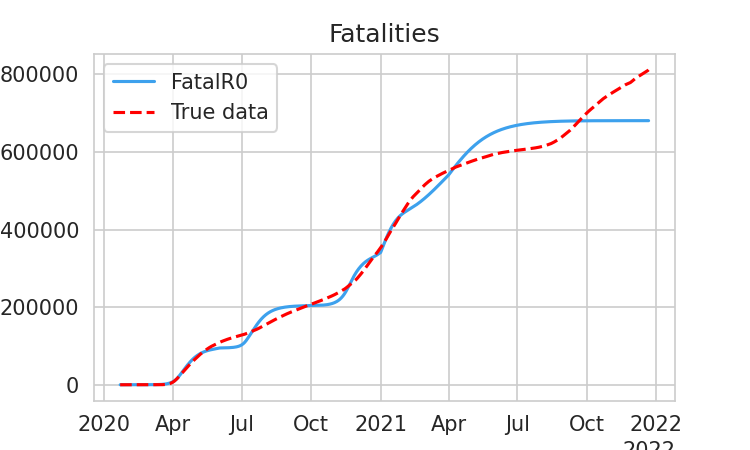

In [171]:
pred_fatal = pred_data.filter(regex=("FatalR.*"))

fig = plt.figure()

for i in range(num_sol_to_plot-1,-1,-1):
    plt.plot(dates,pred_fatal["FatalR"+str(i)], color=grey_colors[i])
    
plt.plot(dates,smoothed_data["deaths_smooth"],'r--')
ax = plt.gca()
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)
    
labels = pred_fatal.columns[0:num_sol_to_plot][::-1].tolist();
labels.append("True data");
plt.legend(labels,loc='upper left')
plt.title('Fatalities')
plt.show()


<IPython.core.display.Javascript object>


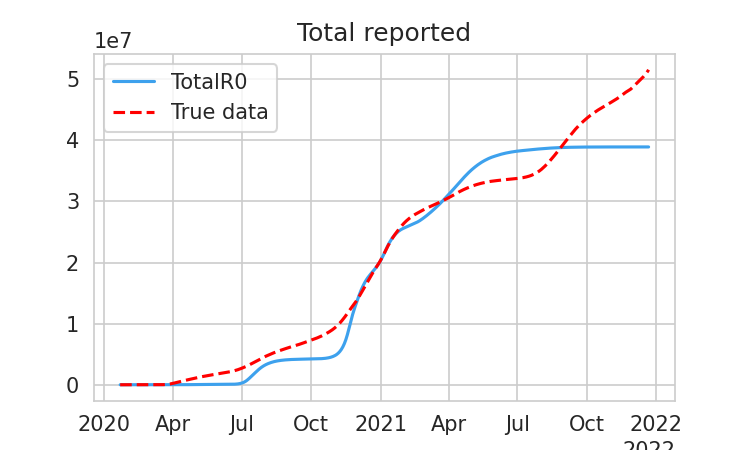

In [172]:
pred_reported = pred_data.filter(regex=("TotalR.*"))
# print(pred_reported)

plt.figure()

for i in range(num_sol_to_plot-1,-1,-1):
    plt.plot(dates, pred_reported["TotalR"+str(i)], color=grey_colors[i])

# plt.plot(pred_reported)
plt.plot(dates, smoothed_data["confirmed_smooth"],'r--')
ax = plt.gca()
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)

labels = pred_reported.columns[0:num_sol_to_plot][::-1].tolist();
labels.append("True data");
plt.legend(labels,loc='upper left')
plt.title('Total reported')
plt.show()

<IPython.core.display.Javascript object>


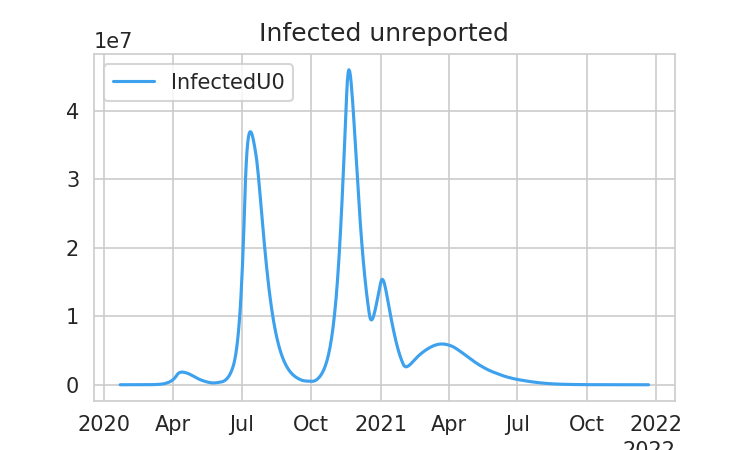

In [164]:
pred_reported = pred_data.filter(regex=("InfectedU.*"))
# print(pred_reported)

plt.figure()

for i in range(num_sol_to_plot-1,-1,-1):
    plt.plot(dates, pred_reported["InfectedU"+str(i)], color=grey_colors[i])

# plt.plot(dates, smoothed_data["confirmed_smooth"],'r--')
ax = plt.gca()
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)

labels = pred_reported.columns[0:num_sol_to_plot][::-1].tolist();
labels.append("True data");
plt.legend(labels,loc='upper left')
plt.title('Infected unreported')
plt.show()

       TotalVac0
0            0.0
1            0.0
2            0.0
3            0.0
4            0.0
..           ...
696  202615927.0
697  202793688.0
698  202960847.0
699  203119166.0
700  203288624.0

[701 rows x 1 columns]


<IPython.core.display.Javascript object>


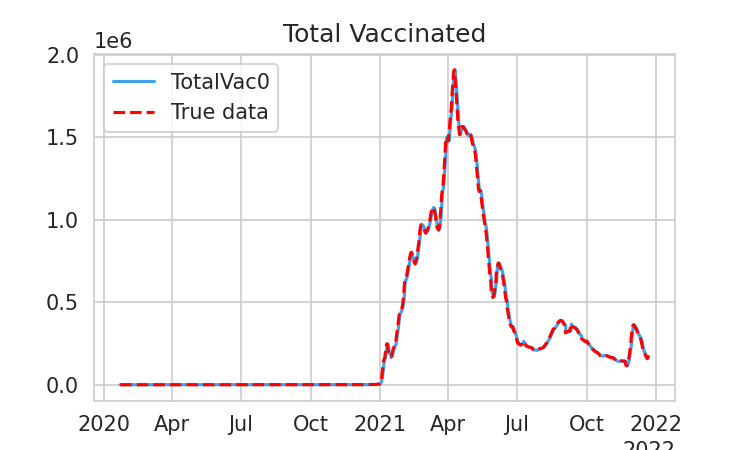

In [165]:
pred_vaccine = pred_data.filter(regex=("TotalVac.*"))
print(pred_vaccine)

plt.figure()

for i in range(num_sol_to_plot-1,-1,-1):
    plt.plot(dates, pred_vaccine["TotalVac"+str(i)].diff(), color=grey_colors[i])

# plt.plot(pred_reported)
plt.plot(dates, smoothed_data["vaccine_smooth"].diff(),'r--')
ax = plt.gca()
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)

labels = pred_vaccine.columns[0:num_sol_to_plot][::-1].tolist();
labels.append("True data");
plt.legend(labels,loc='upper left')
plt.title('Total Vaccinated')
plt.show()

<IPython.core.display.Javascript object>


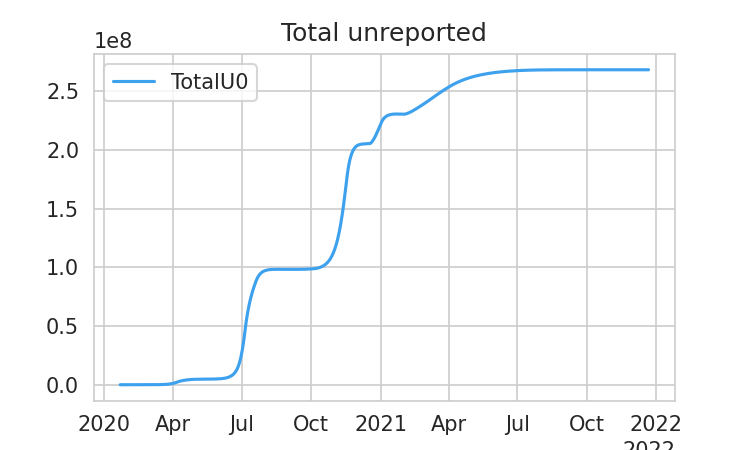

In [166]:
pred_unreported = pred_data.filter(regex=("TotalU.*"))
# print(pred_unreported)

plt.figure()

for i in range(num_sol_to_plot-1,-1,-1):
    plt.plot(dates, pred_unreported["TotalU"+str(i)], color=grey_colors[i])

ax = plt.gca()
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)

labels = pred_unreported.columns[0:num_sol_to_plot][::-1].tolist();
plt.legend(labels,loc='upper left')
plt.title('Total unreported')
plt.show()

        Reff0
0    5.606631
1    5.606631
2    5.606631
3    5.606631
4    5.606630
..        ...
696  0.248556
697  0.254167
698  0.259803
699  0.257699
700  0.252056

[701 rows x 1 columns]


<IPython.core.display.Javascript object>


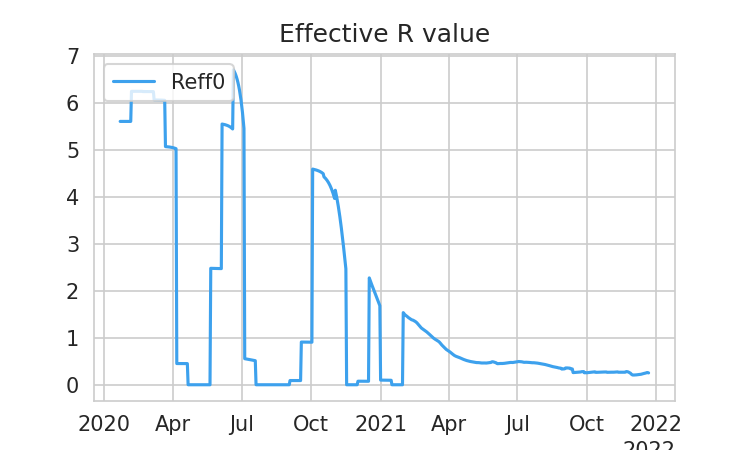

<IPython.core.display.Javascript object>


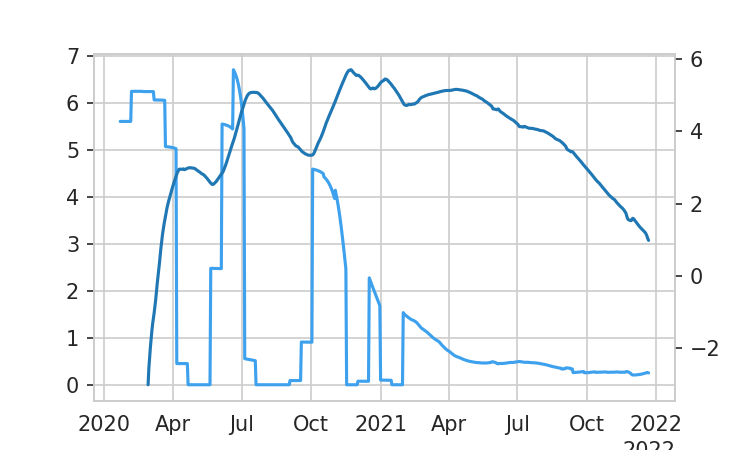

/home/savithru/.local/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [174]:
pred_Reff = pred_data.filter(regex=("Reff.*"))
print(pred_Reff)

plt.figure()

for i in range(num_sol_to_plot-1,-1,-1):
    plt.plot(dates, pred_Reff["Reff"+str(i)], color=grey_colors[i])

ax = plt.gca()
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)

labels = pred_Reff.columns[0:num_sol_to_plot][::-1].tolist();
plt.legend(labels,loc='upper left')
plt.title('Effective R value')
plt.show()

plt.figure()
plt.plot(dates, pred_Reff["Reff0"], color=grey_colors[0])

ax = plt.gca()
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)

ax2 = ax.twinx()
ax2.xaxis.set_major_locator(locator)
ax2.xaxis.set_major_formatter(formatter)
ax2.plot(dates, np.log10(pred_reported["TotalR0"].diff()))
ax2.grid(None)
plt.show()

<IPython.core.display.Javascript object>


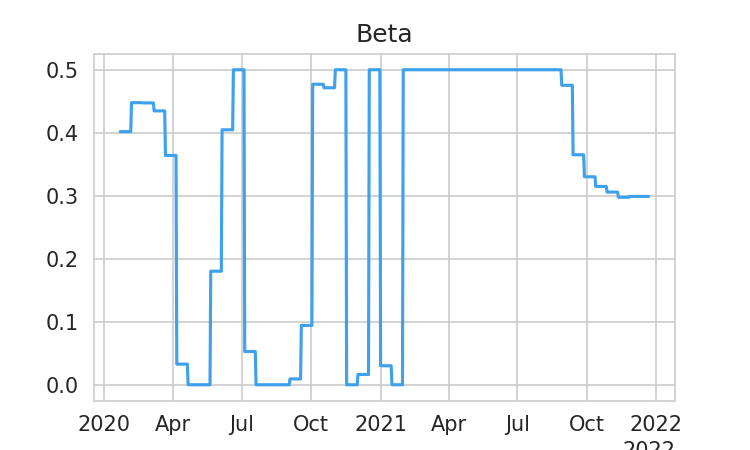

In [173]:
plt.figure()
for i in range(num_sol_to_plot-1,-1,-1):
    plt.plot(dates, beta[i], color=grey_colors[i])
# sns.lineplot(data=beta,palette=grey_colormap, dashes=False)
ax = plt.gca()
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)
plt.title('Beta')
plt.show()

<IPython.core.display.Javascript object>


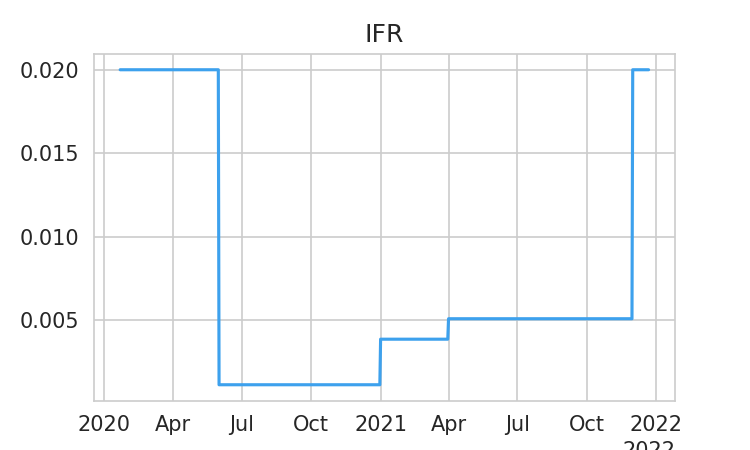

In [169]:
plt.figure()
for i in range(num_sol_to_plot-1,-1,-1):
    plt.plot(dates, IFR[i], color=grey_colors[i])
# sns.lineplot(data=IFR,palette="ch:s=.25,rot=-.25,reverse=1", dashes=False)
ax = plt.gca()
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)
plt.title('IFR')
plt.show()

In [ ]:

err_t = (pred_data['TotalR0'] - smoothed_data["confirmed_smooth"])
err_f = (pred_data['FatalR0'] - smoothed_data["deaths_smooth"])
cost_t = np.linalg.norm(err_t)**2 / np.linalg.norm(smoothed_data["confirmed_smooth"])**2;
cost_f = np.linalg.norm(err_f)**2 / np.linalg.norm(smoothed_data["deaths_smooth"])**2
print(cost_t, cost_f, cost_t+cost_f)
#print(smoothed_data["confirmed_smooth"])

In [ ]:
print(err_t)
print(format(np.linalg.norm(smoothed_data["confirmed_smooth"])**2, '1.8e'))
print(format(np.linalg.norm(smoothed_data["deaths_smooth"])**2, '1.8e'))